In [1]:
import requests
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
regions = pd.read_csv('noc_regions.csv')
merged = pd.merge(df, regions, on='NOC', how='left')

In [9]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [10]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [11]:
goldMedals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [12]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

Text(0.5, 1.0, 'Distribution of Gold Medals')

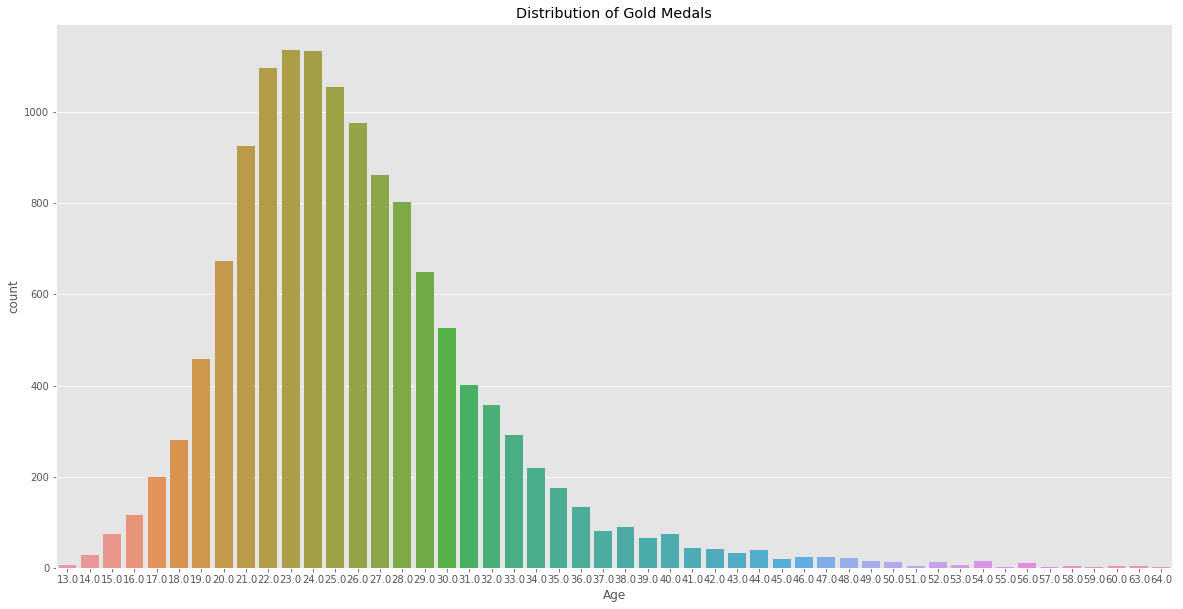

In [13]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

In [14]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

65

In [15]:
masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]

Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

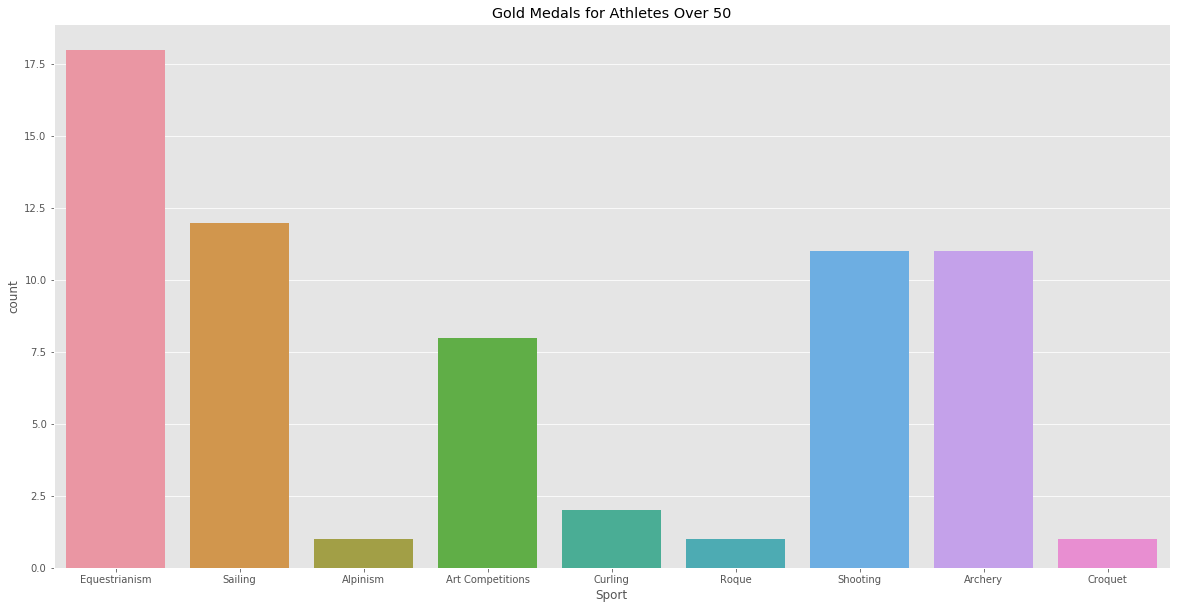

In [16]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 50')

In [29]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [30]:
womenInOlympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands,NaN
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,NaN
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN
136,49,Moonika Aava,F,28.0,168.0,65.0,Estonia,EST,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN


Text(0.5, 1.0, 'Women medals per edition of the Games')

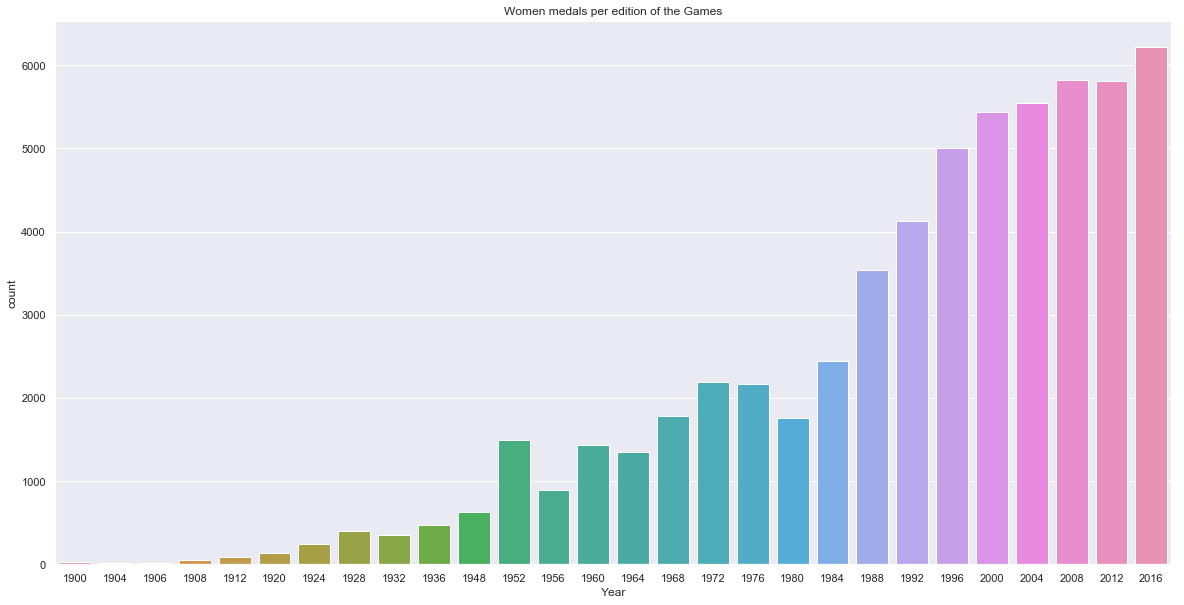

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

In [32]:
womenInOlympics.loc[womenInOlympics['Year'] == 1900].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,France,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold,UK,NaN
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold,UK,NaN
51667,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed Open,NaN,Switzerland,NaN
51668,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Gold,Switzerland,NaN
51669,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver,Switzerland,NaN
54280,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN,France,NaN
54281,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",NaN,France,NaN


In [33]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1900].count()

33

In [34]:
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Medals per Country')

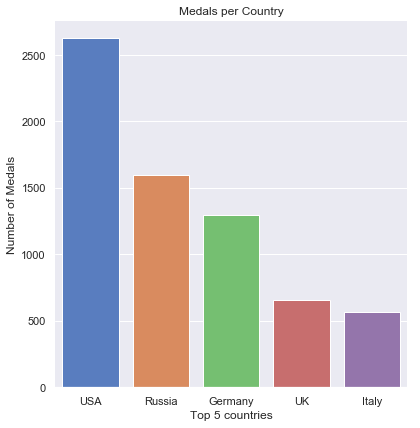

In [35]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [36]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

In [37]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


In [38]:
basketballGoldUSA = goldMedalsUSA.loc[(goldMedalsUSA['Sport'] == 'Basketball') & (goldMedalsUSA['Sex'] == 'M')].sort_values(['Year'])

In [39]:
basketballGoldUSA.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
71407,36368,"Joseph Cephis ""Joe"" Fortenberry",M,25.0,203.0,84.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
195790,98309,Jack Williamson Ragland,M,22.0,183.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
213368,107150,Willard Theodore Schmidt,M,26.0,205.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
219204,110112,Carl Leslie Shy,M,27.0,183.0,77.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
22390,11790,Ralph English Bishop,M,20.0,193.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


In [40]:
groupedBasketUSA = basketballGoldUSA.groupby(['Year']).first()
groupedBasketUSA

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,
1936,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1948,101443,"Robert Lloyd Jackson ""Jack"" Robinson",M,21.0,183.0,82.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1952,58738,"Robert Earl ""Bob"" Kenney",M,21.0,188.0,84.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1956,128271,"James Patrick ""Jim"" Walsh",M,26.0,193.0,86.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1960,13371,"Robert Lewis ""Bob"" Boozer",M,23.0,203.0,99.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1964,130843,"George ""Jiff"" Wilson",M,22.0,203.0,95.0,United States,USA,1964 Summer,Summer,Tokyo,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1968,8104,"Michael Thomas ""Mike"" Barrett",M,25.0,188.0,73.0,United States,USA,1968 Summer,Summer,Mexico City,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1976,65853,"Thomas Joseph ""Tom"" LaGarde",M,21.0,208.0,97.0,United States,USA,1976 Summer,Summer,Montreal,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1984,120501,Wayman Lawrence Tisdale,M,20.0,205.0,118.0,United States,USA,1984 Summer,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold,USA,NaN


In [41]:
groupedBasketUSA['ID'].count()

15

In [17]:
athlete = df[df['Season'] == 'Summer']
athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN


In [18]:
medal = df[df['Medal'] == 'Gold']
medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold


In [19]:
good = medal[medal['Year']==2000]
good

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
178,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold
220,106,Agostino Abbagnale,M,34.0,188.0,96.0,Italy,ITA,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Quadruple Sculls,Gold
587,337,Mukhammad Kadyr Abdullayev,M,26.0,169.0,63.0,Uzbekistan,UZB,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Light-Welterweight,Gold
591,339,Namiq Yadulla Abdullayev,M,29.0,167.0,55.0,Azerbaijan,AZE,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Gold
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
720,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold
739,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold
2184,1221,"Taismary ""Tai"" Agero Leiva (-Botteghi)",F,23.0,175.0,70.0,Cuba,CUB,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Women's Volleyball,Gold
2689,1498,"Charles Benedict ""Ben"" Ainslie",M,23.0,183.0,90.0,Great Britain,GBR,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed One Person Dinghy,Gold
2696,1500,Kurt Harold Ainsworth,M,22.0,187.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold


In [20]:
USA = medal[medal['NOC']=='USA']
USA

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
710,404,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold
711,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold
739,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold
787,454,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold
1239,699,"Charles Edwin ""Charley"" Ackerly",M,22.0,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold
1345,762,"Gordon Belgum ""Gordy"" Adam",M,21.0,NaN,NaN,United States,USA,1936 Summer,1936,Summer,Berlin,Rowing,Rowing Men's Coxed Eights,Gold
1472,818,Harry Lester Adams,M,31.0,NaN,NaN,United States,USA,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Military Rifle, 200, 400, 500 a...",Gold
1511,836,Platt Adams,M,27.0,188.0,78.0,United States,USA,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Standing High Jump,Gold


In [21]:
Summer = USA[USA['Season'] == 'Summer']
Summer

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
710,404,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold
711,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold
739,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold
787,454,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.0,68.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold
1239,699,"Charles Edwin ""Charley"" Ackerly",M,22.0,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold
1345,762,"Gordon Belgum ""Gordy"" Adam",M,21.0,NaN,NaN,United States,USA,1936 Summer,1936,Summer,Berlin,Rowing,Rowing Men's Coxed Eights,Gold
1472,818,Harry Lester Adams,M,31.0,NaN,NaN,United States,USA,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Military Rifle, 200, 400, 500 a...",Gold
1511,836,Platt Adams,M,27.0,188.0,78.0,United States,USA,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Standing High Jump,Gold


In [22]:
gold_year = pd.DataFrame(Summer['Year'].value_counts())

In [23]:
gold_year.sort_index(inplace=True)

print(gold_year.to_string())

      Year
1896    11
1900    30
1904   128
1906    12
1908    34
1912    46
1920   111
1924    97
1928    47
1932    81
1936    51
1948    87
1952    83
1956    61
1960    81
1964    95
1968    99
1972    69
1976    70
1984   186
1988    87
1992    89
1996   159
2000   130
2004   117
2008   127
2012   145
2016   139


In [24]:
gold_year.sort_index()

,Year
1896,11
1900,30
1904,128
1906,12
1908,34
1912,46
1920,111
1924,97
1928,47
1932,81


In [27]:
gold_year.rename(columns = {'Year':'Medal'}, inplace=True)
gold_year

,Medal
1896,11
1900,30
1904,128
1906,12
1908,34
1912,46
1920,111
1924,97
1928,47
1932,81


In [28]:
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = gold_year
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)


28    157.550515
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
